# Análisis de datos y visualización

### Objetivo general: 
A través de este laboratorio pretendemos establecer buenas prácticas en el proceso de análisis de datos y modelos predictivos.

### Objetivo particular
Implementar un esquema completo desde el análisis de los datos hasta la construcción del modelo de regresión que permita predecir costos de viviendas partiendo de diferentes atributos de las mismas.

---



**Parte 1**: Análisis y visualización de datos
  *   Tipos de variables.
  *   Identificación de valores faltantes.
  *   Identificación de valores atípicos (outliers).
  *   Correlación de variables.

---

**Parte 2**: Modelo
  * Ingeniería de características.
  * Modelo predictivo.
    * Entrenamiento, validación y test.

### Dataset
La base de datos contiene información sobre atributos utilizados para tasar propiedades residenciales en la ciudad de Ames (Iowa).

- **Período**: 2006 - 2010
- **Cantidad de variables**: 82
- **Fuente**: Oficina de Tasación de inmuebles de Ames (Iowa)
- **Información adicional**
   -  http://jse.amstat.org/v19n3/decock.pdf
   -  [codebook](https://drive.google.com/file/d/1pDkSyI8UHtLEFdjpAVNmsVqB8N6a5Pqv/view?usp=sharing)

## Parte 1: Análisis y visualización

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

#!pip install plotly==5.3.1                  
import plotly.express as px                 # Librería que permite realizar visualizaciones interactivas 
                                            # Algunas funciones usadas se encuentran en versiones más actuales: desde la  4.12.0
                                            # Si tiene una versión anterior, instalar: !pip install plotly==5.3.1
# Consultar versión de plotly instalada
# import plotly
# print(plotly.__version__)

In [2]:
# Leemos el dataset
path = 'https://drive.google.com/uc?export=download&id=1UVZnskEk-GZbTo4uW2usL7ze92XVDS8_'
df = pd.read_csv(path)

# Información básica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   PID            2930 non-null   int64  
 2   MSSubClass     2930 non-null   int64  
 3   MSZoning       2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   int64  
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 18  OverallQ

*Notar que existen atributos en los que se pueden encontrar algunos (o muchos) **valores faltantes**. Dados por la diferencia entre la cantidad de entradas y la cantidad de valores ```non-null```*

In [3]:
missings = df.isna().sum()
missings[missings > 0].sort_values()

Electrical         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
BsmtFinSF2         1
GarageCars         1
BsmtFullBath       2
BsmtHalfBath       2
MasVnrArea        23
MasVnrType        23
BsmtFinType1      80
BsmtQual          80
BsmtCond          80
BsmtFinType2      81
BsmtExposure      83
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
LotFrontage      490
FireplaceQu     1422
Fence           2358
Alley           2732
MiscFeature     2824
PoolQC          2917
dtype: int64

Además, podemos ver que hay distintos tipos de datos:
* int64: valores numéricos enteros
* float64:   valores numéricos reales
* object:  variables categóricas

In [4]:
# Podemos resumir la cantidad de atributos de cada tipo
df.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [5]:
# Exploramos algunas observaciones al azar del dataset
df.sample(10)

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
76,77,531451280,60,RL,70.0,11218,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1055.0,1055.0,...,Y,SBrkr,1055,790,0,1845,0.0,0.0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1992.0,RFn,2.0,462.0,TA,TA,Y,635,104,0,0,0,0,NaN,GdPrv,Shed,400,5,2010,WD,Normal,189000
1768,1769,528354060,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862.0,Unf,0.0,255.0,1117.0,...,Y,SBrkr,1127,886,0,2013,1.0,0.0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2.0,455.0,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
2240,2241,910205130,50,RM,75.0,13710,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,5,5,1950,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,420.0,Unf,0.0,490.0,910.0,...,Y,FuseA,910,648,0,1558,0.0,0.0,1,1,4,1,TA,6,Typ,0,NaN,Attchd,1950.0,Unf,1.0,282.0,TA,TA,Y,289,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,152000
323,324,923202105,20,RL,93.0,10114,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1430.0,1430.0,...,Y,SBrkr,1430,0,0,1430,0.0,0.0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2.0,624.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,173500
1371,1372,904100020,20,RL,82.0,9488,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1947,1993,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1046.0,1046.0,...,N,SBrkr,1054,0,0,1054,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1947.0,Unf,1.0,240.0,TA,TA,Y,0,60,122,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Abnorml,124000
1808,1809,531375140,20,RL,60.0,12450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,5,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,126.0,Gd,TA,PConc,Gd,TA,No,GLQ,729.0,Unf,0.0,365.0,1094.0,...,Y,SBrkr,1094,0,0,1094,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,2004.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,149000
2873,2874,910200060,50,RM,50.0,7000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,7,1926,1950,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,374.0,Unf,0.0,487.0,861.0,...,Y,SBrkr,861,424,0,1285,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1950.0,Fin,2.0,506.0,TA,TA,Y,96,0,132,0,0,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal,145400
1859,1860,533254130,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
130,131,534451150,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,Po,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,728.0,728.0,...,Y,SBrkr,1306,0,0,1306,0.0,0.0,1,0,3,1,Fa,6,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,263,0,0,0,0,0,NaN,GdWo,Shed,450,5,2010,WD,

*Si observamos los valores de los distintos atributos numérico podemos intuir que no todos consideran un orden. Por ejemplo ```OverallQual``` es una escala en {1,..,10}. Pero ```MSSubClass``` muestra códigos para algún tipo de categoría. Podemos corroborar en detalle estas variables con la descripción del dataset.*

**Lectura de clasificación de variables desde el archivo de referencia**

En el archivo *txt [codebook](https://drive.google.com/file/d/1pDkSyI8UHtLEFdjpAVNmsVqB8N6a5Pqv/view?usp=sharing) se dispone de la descripción de las variables y se identifica el tipo de cada variable. 

Identificaremos en este archivo el tipo al que corresponde cada variable (*Nominal*, *Ordinal*, *Discreta*, *Continua*) teniendo en cuenta las siguientes consideraciones:

-   Las variables del data set aparecen el mismo orden que en el listado.
-   El tipo de variable tiene la denominación exacta que se señala (incluyendo mayúscula inicial).

In [7]:
import urllib.request  # define funciones útiles ara abrir o conectarse a URL's
url_file = "https://drive.google.com/uc?export=download&id=1xJtNKD0LnPUwjwThtl9ZVcK5WwCSTFVL"  # ruta del txt con la descripción de las variables
codebook = urllib.request.urlopen(url_file).read().decode('windows-1252')                      # leemos el txt convirtiéndolo en un string

import re  # manipulación de expresiones regulares (i.e. strings)
typeVariables = re.findall('Nominal|Ordinal|Discrete|Continuous', codebook)                    # Extraemos la clasificación de cada variable desde el string codebook
                                                                             
#typeVariables

A continuación craeamos un dataframe donde dispondremos:

- *nombre*: nombre de la variable
- *tipo*: clasificación de la variable

Posteriormente se podrán utilizar los objetos generados para "filtrar" el dataset según tipo de variable y realizar en análisis exploratorio adecuado para cada caso.

In [8]:
# Creamos un DataFrame con los nombres de las variables y el tipo correspondiente
variables = {'nombre': df.columns[1:],    # removemos la primera variable (Orden) de la lista porque corresponde al orden de observación
             'tipo': typeVariables[1:]}   # ídem
variables = pd.DataFrame(variables)

# Separamos las distintos tipos de variables
nominal = variables[(variables.tipo == 'Nominal')]
ordinal = variables[variables.tipo == 'Ordinal']
discreta = variables[variables.tipo == 'Discrete']
continua = variables[variables.tipo == 'Continuous']

# Contabilizamos cada tipo de variable
print('Cantidad de variables de cada tipo:\n\n',
      'Nominales:', nominal.shape[0], 'variables \n',
      'Ordinales:', ordinal.shape[0], 'variables \n',
      'Discretas:', discreta.shape[0], 'variables \n',
      'Continuas:', continua.shape[0], 'variables')

Cantidad de variables de cada tipo:

 Nominales: 24 variables 
 Ordinales: 23 variables 
 Discretas: 14 variables 
 Continuas: 20 variables


Estas observaciones son importantes porque, en definitiva, los atributos nominales no consideran orden alguno y por lo tanto debemos pensarlos como variables categóricas.

In [9]:
count = []
for attribute in df.columns:
  count.append([attribute, len(df[attribute].unique())])

unique = pd.DataFrame(count, columns=['attribute', 'nunique'])

# Configuración para mostrar el dataFrame completo
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Visualizamos el dataframe ordenando por la cantidad de valores únicos de cada atributo.
unique.sort_values(by='nunique')

,attribute,nunique
42,CentralAir,2
6,Street,2
51,HalfBath,3
66,PavedDrive,3
12,LandSlope,3
10,Utilities,3
7,Alley,3
49,BsmtHalfBath,4
53,KitchenAbvGr,4
9,LandContour,4


In [ ]:
# reseteo la configuración original (no es necesario, es solo para no mostrar toda la tabla.)
pd.reset_option("use_inf_as_na")

# También se puede usar la función nunique()
df.nunique().sort_values()

CentralAir          2
Street              2
Alley               2
BsmtHalfBath        3
PavedDrive          3
HalfBath            3
GarageFinish        3
Utilities           3
LandSlope           3
KitchenAbvGr        4
Fence               4
ExterQual           4
PoolQC              4
LandContour         4
LotShape            4
BsmtExposure        4
BsmtFullBath        4
Electrical          5
MasVnrType          5
MiscFeature         5
BsmtQual            5
BsmtCond            5
ExterCond           5
Fireplaces          5
KitchenQual         5
HeatingQC           5
BldgType            5
FireplaceQu         5
LotConfig           5
YrSold              5
GarageQual          5
GarageCond          5
FullBath            5
GarageType          6
GarageCars          6
SaleCondition       6
Heating             6
BsmtFinType2        6
BsmtFinType1        6
Foundation          6
RoofStyle           6
MSZoning            7
Condition2          8
HouseStyle          8
Functional          8
RoofMatl  

# Visualización de datos
Visualizar los datos es importante para poder encontrar relaciones útiles y entender o generar intuición sobre los datos que estamos analizando, obtener **insights** y prever potenciales problemas.

### Variable objetivo

Como primer paso, proponemos *observar* cómo se distribuyen los precios de venta que es nuestra variable objetivo.

In [ ]:
df['SalePrice'].describe() 

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

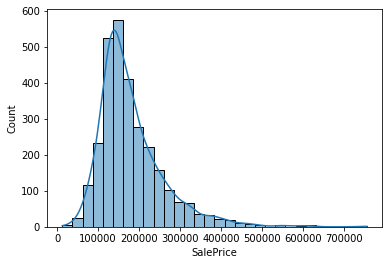

In [ ]:
# train_df.hist('SalePrice', bins=30)
sns.histplot(df['SalePrice'], bins=30, kde=True)

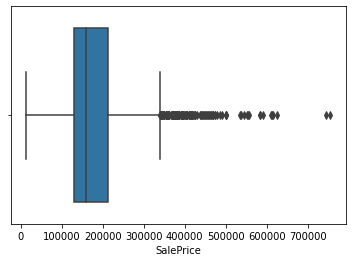

In [ ]:
#train_df.boxplot('SalePrice', vert=False)
sns.boxplot(x=df['SalePrice'])

El gráfico muestra una distribución sesgada a la derecha.

### Correlación

Podemos visualizar la correlación entre cada par de variables.
En este ejemplo tomamos algunas, las definimos en una variable aparte para que sea simple elegir otras.

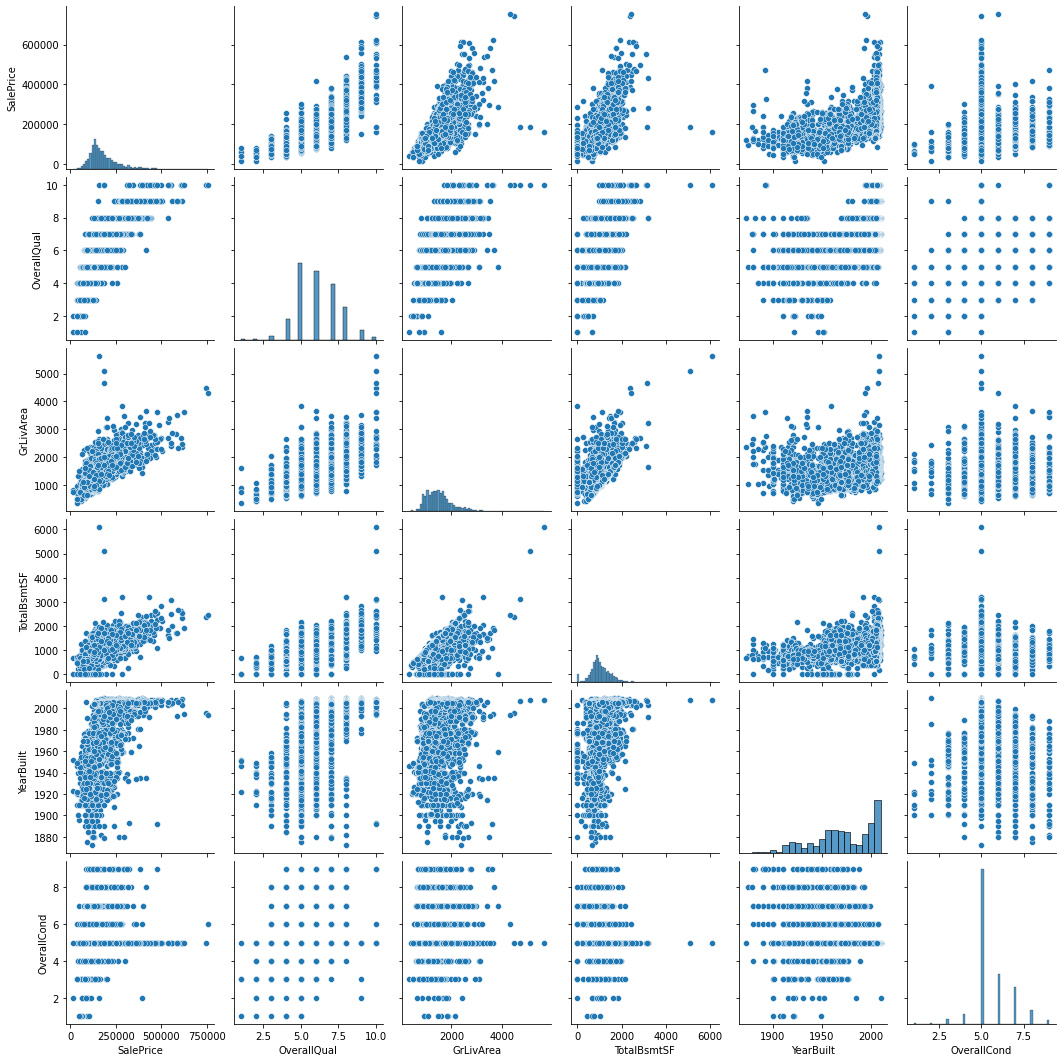

In [ ]:
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'OverallCond']
sns.pairplot(df[columns])

De nuevo, podemos intentar visualizar más variables e identificar cómo se relacionan entre ellas.

Por ejemplo, tiene sentido que la superficie habitable (```GrLivArea```) sea un factor de importancia en la determinación del precio de la vivienda. Como también tiene sentido que no haya más sótano (```TotalBsmtSF```) que superficie habitable.

Además, las variables como calidad y condición toman valores discretos. Para visualizarlos con más claridad podemos utilizar diagramas de caja o boxplot.

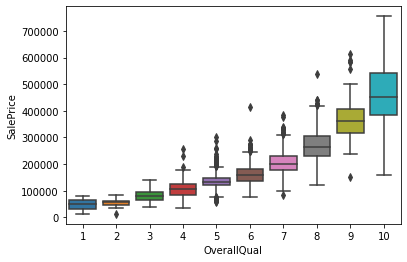

In [ ]:
sns.boxplot(x='OverallQual', y="SalePrice", data=df)

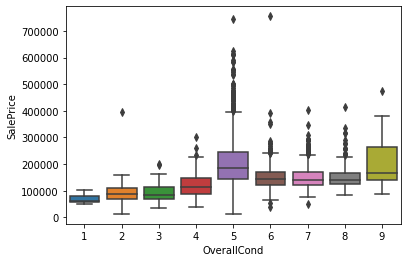

In [ ]:
sns.boxplot(x='OverallCond', y="SalePrice", data=df)

Como estamos analizando distintas variables respecto de ```SalePrice```, podemos programar iterando sobre los atributos de interés y simplemente indicar qué variables pretendemos graficar. Repitiendo el caso anterior:

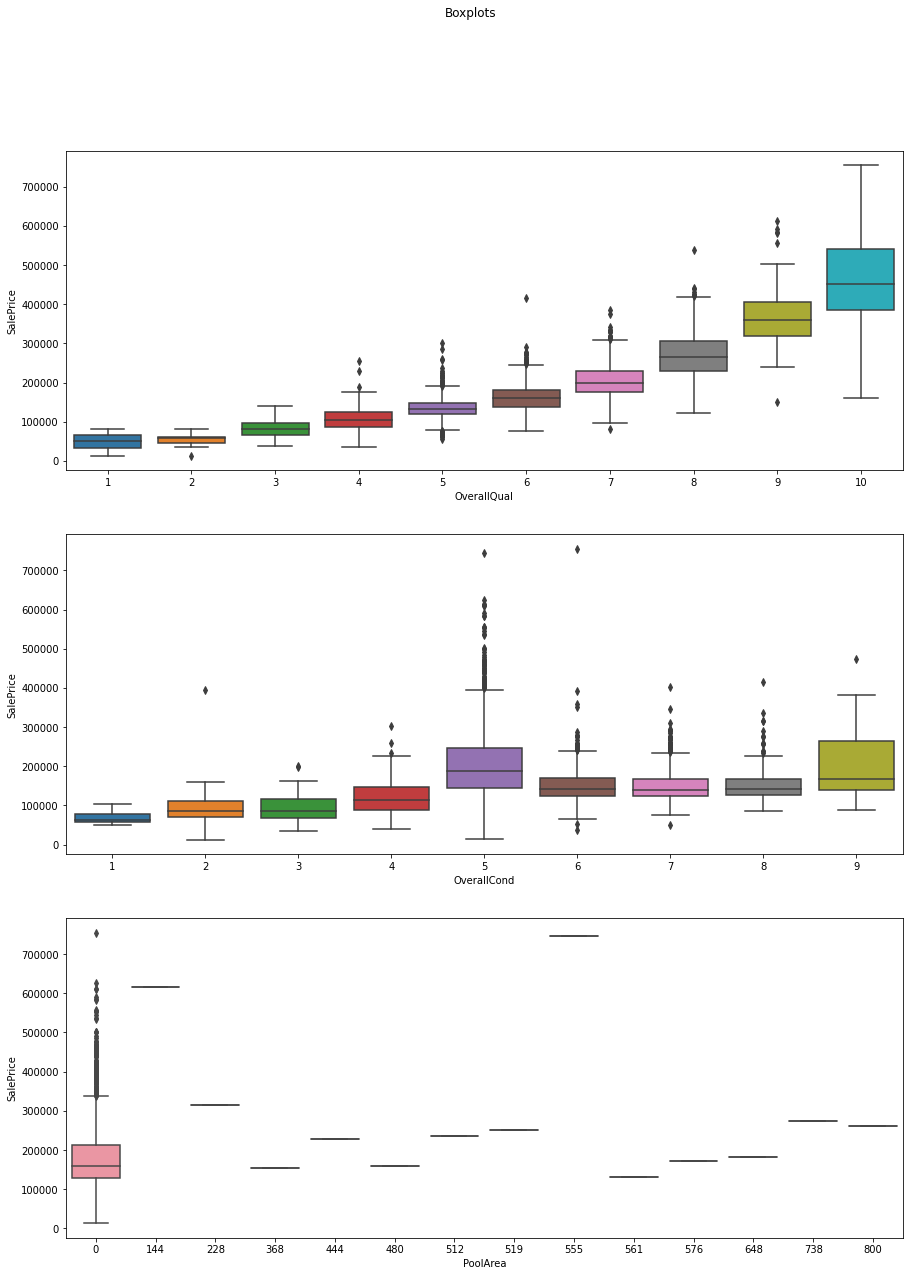

In [ ]:
attributes = ['OverallQual', 'OverallCond', 'PoolArea']

num_rows = len(attributes) # Un gráfico por cada atributo, cada gráfico en una fila.
size = (15,20)             # Tamaño del gráfico completo (donde se mostrarán los subgráficos)

fig, axes = plt.subplots(num_rows, 1, figsize=size)
fig.suptitle('Boxplots')

for idx, attribute in enumerate(attributes):
  sns.boxplot(ax=axes[idx], x=attribute, y="SalePrice", data=df)

Notar, por ejemplo, la tendencia clara entre el índice de calidad de la vivienda y su precio. No solo en la mediana sino también en la dispersión.

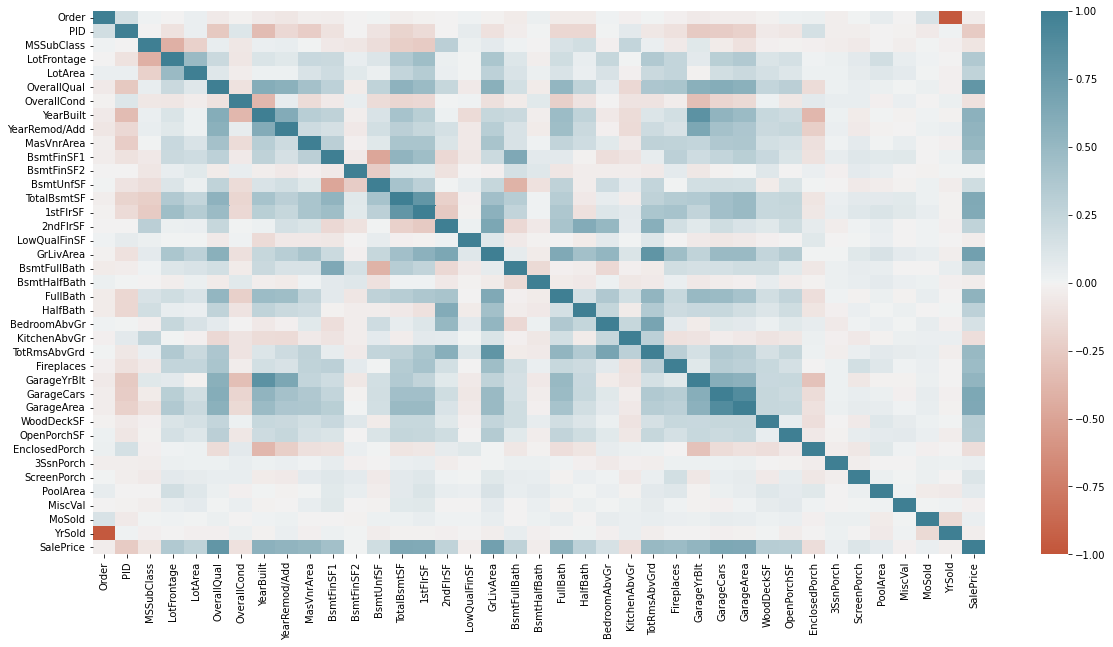

In [10]:
f, ax = plt.subplots(figsize=(20, 10))

# se puede configurar diferentes paletas de colores con la variable <cmap>:
# https://seaborn.pydata.org/tutorial/color_palettes.html
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=256),       # cmap='crest'
            vmin=-1, vmax=1, center=0)

Algunas variables muestran una correlación alta. Con lo cual podemos eliminar algunas. Tiene sentido que lo sean GarageCars y GarageArea.

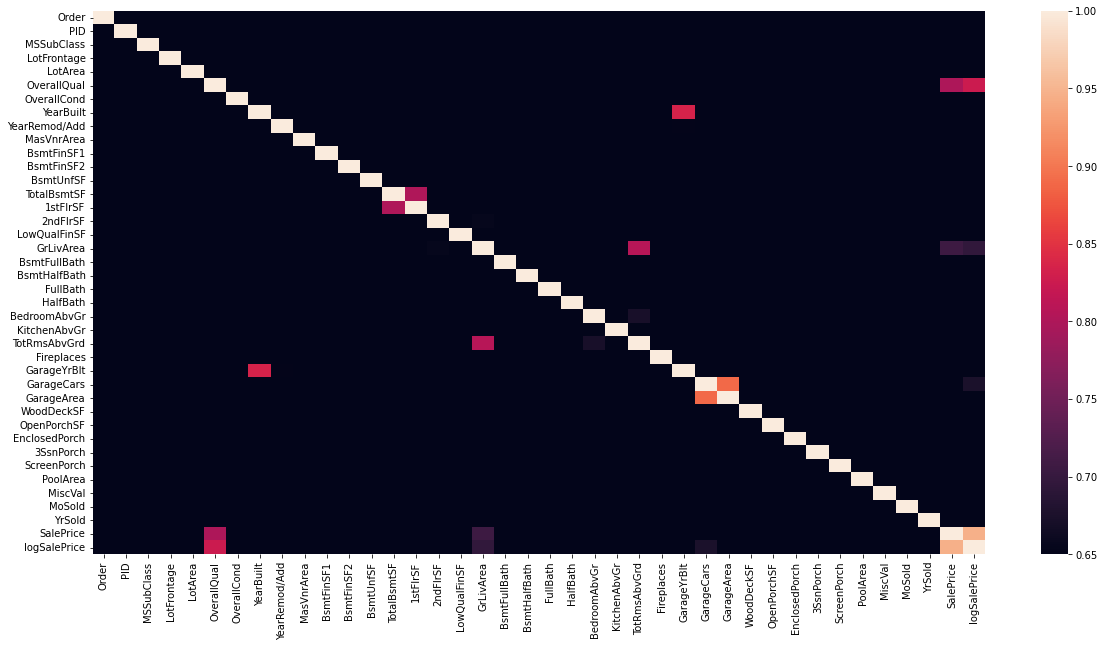

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), vmin=0.65, vmax=1., cmap='rocket')

Podemos filtrar por valor y así encontrar aquellas variables con mayor correlación

**NOTA** La función ```corr()``` solo tiene en cuenta las variables numéricas pero tenemos casos de variables numéricas nominales (no ordinales).

Lo correcto sería hacer el mapa de correlación filtrando las variables que correspondan ¿Cómo lo podemos hacer?

In [ ]:
# Completar acá.

## Visualización con Plotly

[Plotly](https://plotly.com/graphing-libraries/) es una librería que permite realizar de manera sencilla visualizaciones interactivas (también disponible para R, Julia y Matlab). Existen dos módulos:

*   *Plotly Express (plotly.express)*. Importado usualmente *px*. Tiene las funciones más simples y versátiles.
*   *Graph Objects (plotly.graph_objects)*. Importado usualmente *go*. Permite incrementar sustancialmente al complejidad de las visualizaciones. Se pueden realizar los mismo plots que *Plotly Express*, pero en general con una mayor cantidad de líneas.

**Variable de interés**: Precio de la propiedad (Dólares)


In [ ]:
fig = px.histogram(df, x="SalePrice",
                   marginal="box",                             # puede usarse alternativamente 'box', 'rug' o 'violin'
                   title = 'Distribución del precio de ventas',
                   labels={'SalePrice':'Precio de venta'},
                   hover_data=['Order'],
                   histnorm = 'percent')
fig.update_yaxes(title_text='Frecuencia')
fig.show()

Estos gráficos puede guardarse en formato *html* o incorporarse en dahsboards, por ejemplo.


In [ ]:
import plotly.graph_objects as go
from google.colab import files

go.Figure.write_html(fig,"plot.html")  # generar un html or imagen
files.download("plot.html")            # decargar el achivo generado

Una de las variables principales  en cuanto incidencia en el precio de las propiedades es la superficie cuebierta (pies cuadrados).

- ¿Qué se puede observar en el gráfico de dispersión?
- ¿Podría aplicar alguna transformación sobre alguna?

In [ ]:
fig = px.scatter(
    df, x='GrLivArea', y='SalePrice', opacity=0.65,
    trendline='ols', trendline_color_override='red',
    marginal_x='box',
    marginal_y='violin', 
    hover_data=['Order', 'LotArea'],
    title = 'Relación entre el precio de venta y la superficie cubierta de las propiedades'
)
fig.update_traces(marker_size=10, marker_color= 'rgba(255, 182, 193, .9)')
fig.show()

In [11]:
# Cramos una nueva variable: logaritmo del precio de venta
df['logSalePrice'] = np.log(df['SalePrice'])

fig = px.scatter(
    df, x='GrLivArea', y='logSalePrice', opacity=0.65,
    trendline='ols', trendline_color_override='red',
    marginal_x='box',
    marginal_y='violin', 
    hover_data=['Order', 'LotArea'],
    title = 'Relación entre el precio de venta y la superficie cubierta de las propiedades'
)
fig.update_traces(marker_size=10, marker_color= 'rgba(255, 182, 193, .9)')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Valores atípicos

Uno de los principales problemas que suelen surgir son la presencia de valores atípicos u outliers. Su identificación es importante, aunque el criterio de qué hacer con ellos varía de acuerdo a cada problema puntual.

Valores fuera del rango [200.875,2667.875]       son considerados anómalos


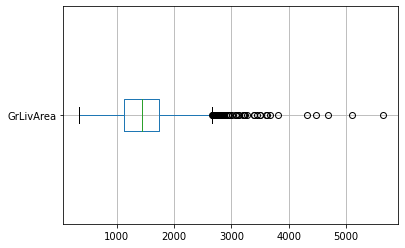

In [12]:
# veamos un caso particular y calculemos los límites asociados

attribute = 'GrLivArea'

q1 = df[attribute].quantile(0.25)
q2 = df[attribute].quantile(0.5)
q3 = df[attribute].quantile(0.75)
irq = q3 - q1

lower_whisker = q1 - irq * 1.5
upper_whisker = q3 + irq * 1.5

df[[attribute]].boxplot(vert=False)

print('Valores fuera del rango [{},{}] \
      son considerados anómalos'.format(lower_whisker, upper_whisker))

*Boxplot con Plotly*

In [14]:
attribute = 'GrLivArea'

fig = px.box(df, x="GrLivArea")
fig.show()

# Datos faltantes

Anteriormente vimos que existían atributos con diferente cantidad de entradas nulas. Podemos ver en proporción a la cantidad de datos cuántos de estos atributos faltan:

In [ ]:
# Porcentaje de valores faltantes

missings = df.isna().sum()      # Chequeamos los valores nulos y los contamos.
missings[missings > 0].sort_values()  # Filtramos solo aquellos que tienen valores nulos

missing_percentage = (missings[missings > 0] / len(df) *100).sort_values()
missing_percentage

Electrical       0.034130
GarageArea       0.034130
TotalBsmtSF      0.034130
BsmtUnfSF        0.034130
BsmtFinSF1       0.034130
BsmtFinSF2       0.034130
GarageCars       0.034130
BsmtFullBath     0.068259
BsmtHalfBath     0.068259
MasVnrArea       0.784983
MasVnrType       0.784983
BsmtFinType1     2.730375
BsmtQual         2.730375
BsmtCond         2.730375
BsmtFinType2     2.764505
BsmtExposure     2.832765
GarageType       5.358362
GarageFinish     5.426621
GarageQual       5.426621
GarageCond       5.426621
GarageYrBlt      5.426621
LotFrontage     16.723549
FireplaceQu     48.532423
Fence           80.477816
Alley           93.242321
MiscFeature     96.382253
PoolQC          99.556314
dtype: float64

En términos generales tenemos que decidir cómo trabajar como actuar ante estos faltantes. Más allá de cómo mitigar esa ausencia, lo que resulta evidente es que para algunos atributos no tenemos casi información.

Posibles criterios a tomar:

-  Imputación: completar los datos faltantes (pueden optarse por siluciones simples o más complejas).
-  Eliminar los atributos que se correspondan con un porcentaje suficientemente grande (más del 10%, 15%, 20%, 50%?)



In [ ]:
attributes_to_drop = missing_percentage[missing_percentage > 16.0].index.to_list()
print('Los atributes a eliminar:', attributes_to_drop)

Los atributes a eliminar: ['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC']


In [ ]:
df.drop(attributes_to_drop, axis=1, inplace=True)

Por otro lado, si observaos de nuevo la cantidad de entradas asociadas, podemos ver que por ejemplo el atributo 'Electrical' se corresponde solo con una entrada. Es decir, hay solo una entrada en la que perdemos el atributo ```Electrical```. Y podemos simplemente prescindir de ella.

In [ ]:
missings = df.isna().sum()
missings[missings > 0].sort_values()

TotalBsmtSF       1
GarageArea        1
GarageCars        1
Electrical        1
BsmtFinSF1        1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtHalfBath      2
BsmtFullBath      2
MasVnrType       23
MasVnrArea       23
BsmtFinType1     80
BsmtCond         80
BsmtQual         80
BsmtFinType2     81
BsmtExposure     83
GarageType      157
GarageQual      159
GarageYrBlt     159
GarageFinish    159
GarageCond      159
dtype: int64

Similarmente, podemos optar por eliminar aquellas pocas filas que pierden atributos. EL siguiente código funciona para eliminar la fila donde falta el valor para ```Electrical``` pero puede adaptarse para eliminar otros también.

In [ ]:
### Eliminar la entrada con el atributo <Electrical> perdido.
# Buscamos el (los) indices donde falta este atributo.
idx_to_drop = df[df['Electrical'].isna()].index
print('Eliminamos la fila:', idx_to_drop)

# Usamos el índice para eliminarlo de la tabla
df.drop(idx_to_drop, inplace=True)

Eliminamos la fila: Int64Index([1577], dtype='int64')


In [ ]:
train_df

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,...,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,...,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,...,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.

In [ ]:
# Eliminar alguna fila hace que quede  discontinuo el índice del dataframe (Index)
# pero se puede resetear:
df.reset_index(drop=True, inplace=True)
df

In [ ]:
missings = missing_percentage[missing_percentage <= 16.0].index.to_list()
missings.remove('Electrical')
missings

['GarageArea',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'GarageCars',
 'BsmtFullBath',
 'BsmtHalfBath',
 'MasVnrArea',
 'MasVnrType',
 'BsmtFinType1',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtExposure',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'GarageYrBlt']

Si observamos el mapa de correlación, podemos ver que GarageYrBlt tiene alta correlación con YearBlt. Por lo tanto podemos eliminar esta variable.

Se pueden considerar distintas alternativas. En muchos casos suele ser factible reemplazar los valores faltantes con los valores más frecuentes (moda), media o mediana.

Otra opción puede ser intentar inferir estos valores a través de algún modelo de clasificación (usarndo las otras variables para entrenar el modelo)

Por simplicidad vamos a eliminar estas variables. Apoyamos esta decisión por algunas observaciones como: El número de entradas es considerablemente bajo comparado con los otros casos. Las variables que tienen el mismo prefijo tienen la misma cantidad de valores nulos (probablemente se deba a que esos faltantes son en las mismas entradas (chequear)).


In [ ]:
df.drop(missings, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order          2929 non-null   int64 
 1   PID            2929 non-null   int64 
 2   MSSubClass     2929 non-null   int64 
 3   MSZoning       2929 non-null   object
 4   LotArea        2929 non-null   int64 
 5   Street         2929 non-null   object
 6   LotShape       2929 non-null   object
 7   LandContour    2929 non-null   object
 8   Utilities      2929 non-null   object
 9   LotConfig      2929 non-null   object
 10  LandSlope      2929 non-null   object
 11  Neighborhood   2929 non-null   object
 12  Condition1     2929 non-null   object
 13  Condition2     2929 non-null   object
 14  BldgType       2929 non-null   object
 15  HouseStyle     2929 non-null   object
 16  OverallQual    2929 non-null   int64 
 17  OverallCond    2929 non-null   int64 
 18  YearBuilt      2929 non-null

Ahora tenemos un dataset limpio para pensar en el el modelo que queremos utilzar.

Dado que vamos a usar un modelo de regresión tendremos que chequear que se cumplan ciertas condiciones.

Además, tenemos que poder representar las variables categóricas de manera numérica para finalmente entrenar y usar nuestro modelo predictivo.